In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
from sklearn.naive_bayes import MultinomialNB

In [5]:
from sklearn.multiclass import OneVsRestClassifier

In [6]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [7]:
from pandas.plotting import scatter_matrix

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
resume=pd.read_csv('resume_dataset.csv',encoding='utf-8')
resume['Cleaned_resume']=''
resume.head()

,Category,Resume,Cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [10]:
print("Displaying Unique position in this Dataset")
print(*resume['Category'].unique())

Displaying Unique position in this Dataset
Data Science HR Advocate Arts Web Designing Mechanical Engineer Sales Health and fitness Civil Engineer Java Developer Business Analyst SAP Developer Automation Testing Electrical Engineering Operations Manager Python Developer DevOps Engineer Network Security Engineer PMO Database Hadoop ETL Developer DotNet Developer Blockchain Testing


In [11]:
print(resume['Category'].value_counts())

Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

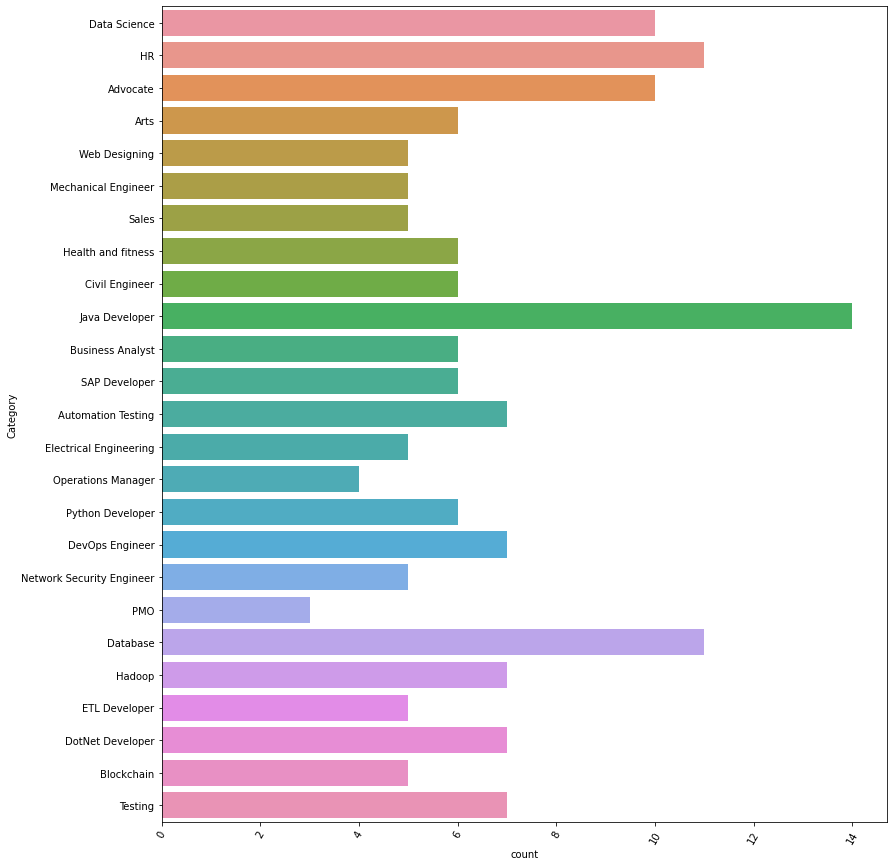

In [12]:
plt.figure(figsize=(13,15))
plt.xticks(rotation=60)
sns.countplot(y="Category",data=resume)

In [13]:
from matplotlib.gridspec import GridSpec


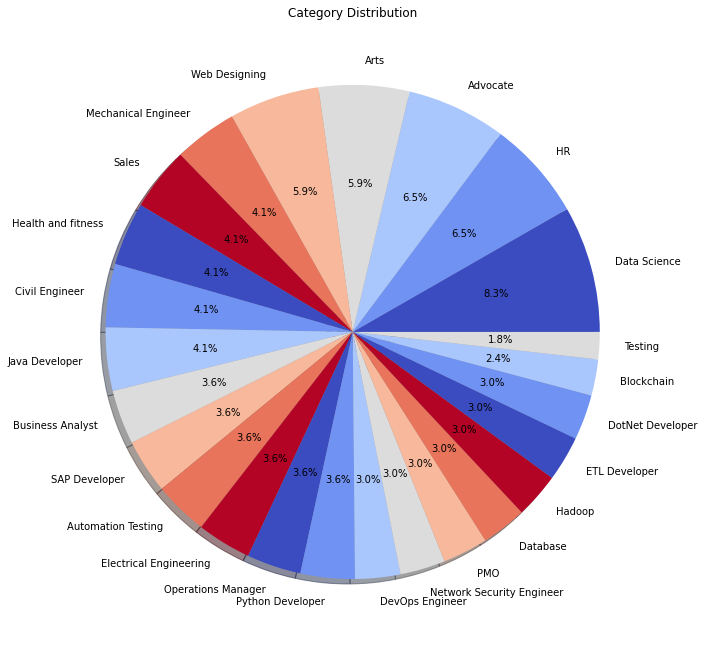

In [14]:
targetcounts=resume['Category'].value_counts()
targetlabels=resume['Category'].unique()

plt.figure(1,figsize=(25,25))
gr=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')
colors=[cmap(i) for i in np.linspace(0,1,7)]
plt.subplot(gr[0,1],aspect=1,title='Category Distribution')

sr_pie=plt.pie(targetcounts,labels=targetlabels,autopct='%1.1f%%',shadow=True,colors=colors)
plt.show()

In [16]:
import re
def cleanResume(resumeText):
    resumeText=re.sub('http\S+\s*',' ',resumeText)
    resumeText=re.sub('RT|cc',' ',resumeText)
    resumeText=re.sub('#\S+','',resumeText)
    resumeText=re.sub('@\S+',' ',resumeText)
    resumeText=re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ', resumeText)
    resumeText=re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText=re.sub('\s+',' ',resumeText)
    return resumeText
resume['Cleaned_resume']=resume.Resume.apply(lambda x: cleanResume(x))
resume.head()

,Category,Resume,Cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [18]:
!pip install wordcloud

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
oneSetOfStopWords=set(stopwords.words('english')+['``',"''"])
totalWords=[]
Sentences=resume['Resume'].values
cleanedSentences=""
for i in range(0,160):
    cleanedText=cleanResume(Sentences[i])
    cleanedSentences+=cleanedText
    requriedWords=nltk.word_tokenize(cleanedText)
    for word in requriedWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist=nltk.FreqDist(totalWords)
mostcommon=wordfreqdist.most_common(50)
print(mostcommon)
            
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


[('Exprience', 601), ('months', 499), ('company', 496), ('Details', 490), ('description', 436), ('1', 345), ('Project', 288), ('data', 243), ('project', 234), ('year', 218), ('SQL', 212), ('6', 209), ('Maharashtra', 205), ('team', 203), ('Less', 203), ('using', 195), ('January', 173), ('Management', 160), ('Pune', 147), ('C', 142), ('Education', 136), ('Ltd', 136), ('management', 135), ('database', 132), ('Data', 125), ('monthsCompany', 121), ('Engineering', 121), ('Server', 121), ('Database', 117), ('India', 117), ('like', 117), ('The', 116), ('various', 115), ('Pvt', 115), ('business', 114), ('application', 114), ('Responsibilities', 113), ('development', 112), ('System', 110), ('reports', 109), ('2', 109), ('A', 108), ('Java', 106), ('issues', 104), ('requirements', 104), ('Mumbai', 101), ('work', 98), ('system', 96), ('Role', 96), ('Test', 96)]


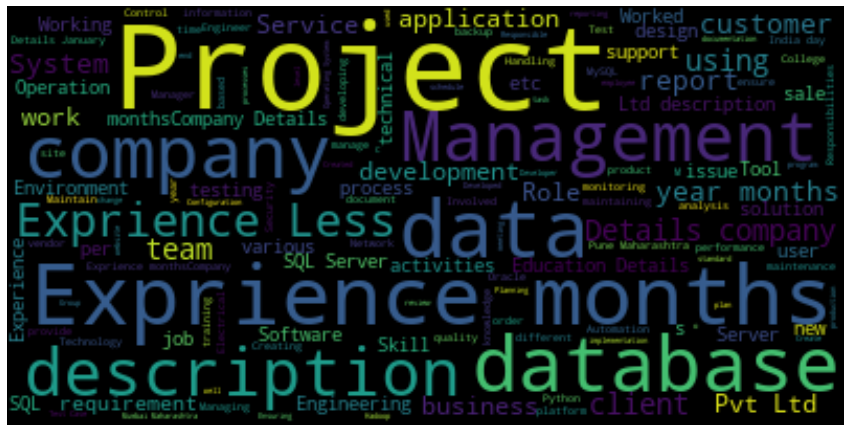

In [20]:
wc=WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
var=['Category']
le=LabelEncoder()
for i in var:
    resume[i] =le.fit_transform(resume[i])

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requriedText=resume['Cleaned_resume'].values
requriedTarget=resume['Category'].values

word_vectorizer=TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(requriedText)
wordFeatures=word_vectorizer.transform(requriedText)

print("Feature completed .....")


x_train,x_test,y_train,y_test=train_test_split(wordFeatures,requriedTarget,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

Feature completed .....
(135, 1500)
(34, 1500)


In [29]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
prediction=clf.predict(x_test)
print('Accuracy of KNeighbors Classifier on training set:{:2f}'.format(clf.score(x_train,y_train)))
print('Accuracy of KNeighbors Classifier on test set:{:2f}'.format(clf.score(x_test,y_test)))

print("\n classification report for classifier %s:\n%s\n" %(clf,metrics.classification_report(y_test,prediction)))

Accuracy of KNeighbors Classifier on training set:0.881481
Accuracy of KNeighbors Classifier on test set:0.794118

 classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50  